<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_Curso_R/blob/main/BackUpsInicial/redes_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autores:** Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

**Institución:** Universidad de la Rioja

**Fecha:** Junio/2025

**Clasificación de Imágenes con Redes Neuronales Convolucionales**

Las redes neuronales convolucionales son conocidas habitualmente por sus siglas en inglés, CNNs (Convolutional Neural Networks).


### Librerías

Verificación versión de TensorFlow

In [26]:
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os
from PIL import Image
import tensorflow as tf
import numpy as np
import kagglehub
from sklearn.metrics import classification_report  #Cálculo de las métricas
print(tf.__version__)

2.18.0


Los imágenes a clasificar son tomadas de:

Julien de la Bruère-Terreault, conjunto de datos "Rock-Paper-Scissors Images", disponible bajo la licencia CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/) en https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

In [2]:
# Clonar repositorio
!git clone https://github.com/ednavivianasegura/ERAP_CursoPython/
os.chdir("/content/ERAP_CursoPython/Modulo2_Fundamentos_AI")



Cloning into 'ERAP_CursoPython'...
remote: Enumerating objects: 918, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 918 (delta 181), reused 99 (delta 93), pack-reused 704 (from 2)
Receiving objects: 100% (918/918), 54.06 MiB | 5.84 MiB/s, done.
Resolving deltas: 100% (450/450), done.
Updating files: 100% (155/155), done.


In [3]:
# Descarga el dataset "rockpaperscissors" del usuario "drgfreeman" usando Kaggle Hub
# Retorna la ruta donde se guardó el dataset descargado
path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")

# Lista todos los archivos y directorios contenidos en la ruta de descarga
# os.listdir() devuelve una lista con los nombres de las entradas en el directorio
contenido = os.listdir(path)

# Notas importantes:
# 1. kagglehub.dataset_download() descarga el dataset en un formato específico de Kaggle
# 2. El dataset puede venir en diferentes estructuras:
#    - Como directorio con subdirectorios (rock/, paper/, scissors/)
#    - Como archivo comprimido (dataset.zip)
# 3. Si os.listdir() falla, puede ser porque:
#    - La descarga no se completó correctamente
#    - El path retornado no es un directorio directamente accesible
#    - Se necesitan permisos adicionales



100%|██████████| 306M/306M [00:15<00:00, 20.9MB/s]

Extracting files...


In [4]:
# Imprime el número de archivos en el directorio 'rock'
print(len(os.listdir(path + "/" + "rock")))  # Muestra cuántas imágenes de 'rock' hay disponibles

# Imprime el número de archivos en el directorio 'paper'
print(len(os.listdir(path + "/" + "paper")))  # Muestra cuántas imágenes de 'paper' hay disponibles

# Lista TODOS los archivos en el directorio 'scissors' (puede ser mucha salida)
print(os.listdir(path + "/" + "scissors"))  # Muestra los nombres de todos los archivos de 'scissors'

726
712
['W6jpdF8qZXwnsopw.png', 'HEvNErOwJyFQMMIB.png', 'KAXMiWZQIm1n1Hji.png', 'VRUsuwjXjZtW1Kaj.png', 'XSI0ZmaJN2CfPs3B.png', 'TfQG2fJYyDv8Ic8P.png', 'RtsIA3p963IFGi8t.png', 'R9xpzPuawT5aH69c.png', 'oNZAuH1gIa65iSMu.png', 'Tghe750qrbh7MMpP.png', 'sYwtAuLI5zLIEfJI.png', 'j3c7JHbJwmnOq6cu.png', 'dWIQvO3tVSLw4etp.png', 'WGm4eYxzwqkTKaQs.png', 'R9GlL5dx9nmjXWlS.png', 'Vn5KkLfrFuLeRyKZ.png', 'MPiImIdtqCEKxDbP.png', 'MpiOsioYVx1AJelO.png', 'AOao5nWv96N9SV7O.png', 'CmzQ1oRM0ei850Wl.png', 'jMVjrTQfvJ0xLTOt.png', 'Ckqc5ia9xteRont9.png', 'xQL4A9bjTuJuFj5K.png', 'Z1leFM4TO5u2eSaI.png', 'W7ijVLyfVPL2msio.png', 'jbj5K46TOmR5hkWu.png', 'NCHfmPjxa7aay5AX.png', 'JGKvhDVwPPH5n7Kp.png', 'vcEwRcuUMQ89i8on.png', '3kVoftgTNdDcvPPY.png', '6z9hCJxzN11rIsJH.png', 'EwkiPoJwnH40BjKa.png', 'T6IiF7nWO9Tf0adD.png', '7gnNbHRprrV3r7kX.png', 'ta6G9KRgDwtvZsrJ.png', 'c9oqImbEKG7Ij1cO.png', '7Zb3QM9tznboKuQE.png', 'DH7iguASbWIzzBnT.png', 'ZCr3PjDcttbKRAAW.png', 'j1EfA5DclfCJdzLb.png', '2tRxoWcFfrvjsHTZ.png', 'F0440R

### Cargar Imágenes del repositorio:

Se considera que las imágenes están organizadas por categoría, almacenadas en directorios separados llamados *rock*, *paper* y *scissors*. Dentro de cada uno, los archivos de imagen están nombrados secuencialmente desde 0.png hasta 699.png, representando su número correspondiente.


In [5]:
# Descripción de clases y su identificador
descripcion = ("paper", "rock", "scissors")
clases = {"paper": 0, "rock": 1, "scissors": 2}

# Número de imágenes de cada clase a considerar (máximo 700)
num_img_clase = 700

# Porcentajes de división
train_ratio = 0.7
test_ratio = 0.3

# Calcular número de imágenes para entrenamiento y prueba
num_entrena = round(num_img_clase * train_ratio)
num_prueba = round(num_img_clase * test_ratio)

# Inicializar arrays para almacenar los datos
imagenes_entrena = np.empty((num_entrena * len(clases), 200, 300, 3), dtype="uint8")
clases_entrena = np.empty(num_entrena * len(clases), dtype="uint8")

imagenes_prueba = np.empty((num_prueba * len(clases), 200, 300, 3), dtype="uint8")
clases_prueba = np.empty(num_prueba * len(clases), dtype="uint8")

# Para cada clase, seleccionar 700 imágenes aleatorias y dividirlas en train/test
for clase in clases:
    # Obtener lista de todos los archivos en el directorio de la clase
    archivos = os.listdir(path + "/" + clase)

    # Seleccionar aleatoriamente 700 imágenes (sin repetición)
    archivos_seleccionados = random.sample(archivos, num_img_clase)

    # Dividir en conjuntos de entrenamiento y prueba
    archivos_train = archivos_seleccionados[:num_entrena]
    archivos_test = archivos_seleccionados[num_entrena:num_img_clase]

    # Cargar imágenes de entrenamiento
    for i, archivo in enumerate(archivos_train):
        imagen = Image.open(os.path.join(path, clase, archivo))
        indice = i + clases[clase] * num_entrena
        imagenes_entrena[indice] = np.array(imagen)
        clases_entrena[indice] = clases[clase]

    # Cargar imágenes de prueba
    for i, archivo in enumerate(archivos_test):
        imagen = Image.open(os.path.join(path, clase, archivo))
        indice = i + clases[clase] * num_prueba
        imagenes_prueba[indice] = np.array(imagen)
        clases_prueba[indice] = clases[clase]

# Verificación
print(f"Total imágenes entrenamiento: {len(imagenes_entrena)}")
print(f"Total imágenes prueba: {len(imagenes_prueba)}")
print("¡Datos cargados exitosamente!")

Total imágenes entrenamiento: 1470
Total imágenes prueba: 630
¡Datos cargados exitosamente!


# Visualización de imágenes aleatorias

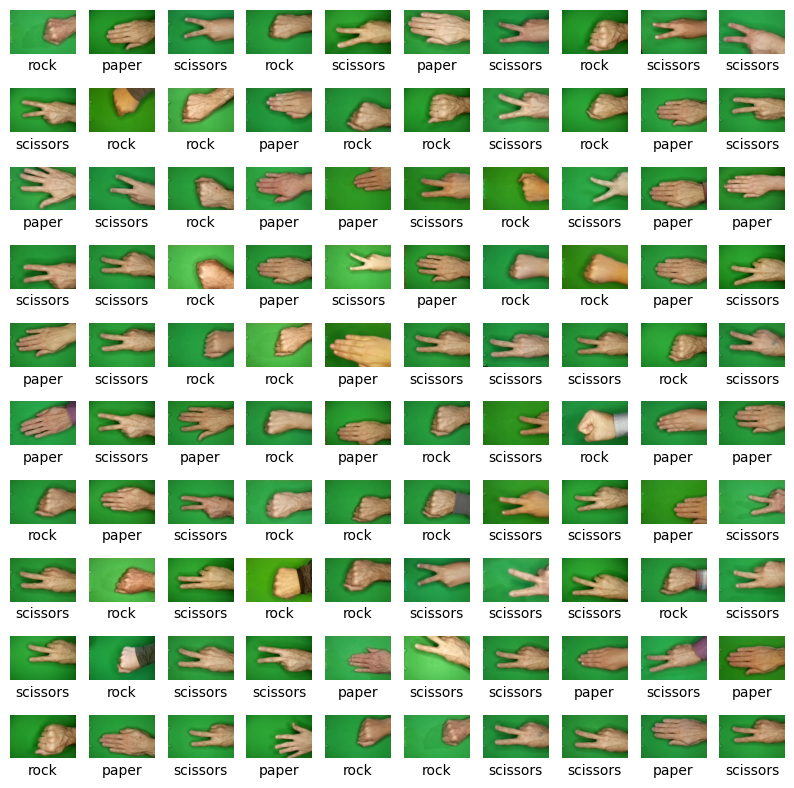

In [6]:
# Crear una figura de matplotlib con tamaño 10x10 pulgadas
plt.figure(figsize=(10, 10))

# Mostrar 100 imágenes en una cuadrícula de 10x10
for i in range(100):
    # Crear subplot en posición i+1 (comienza en 1, no en 0)
    plt.subplot(10, 10, i + 1)

    # Seleccionar un índice aleatorio dentro del rango de imágenes de entrenamiento
    indice = random.randint(0, num_entrena*len(clases) - 1)

    # Mostrar la imagen correspondiente al índice seleccionado
    # Se usa cmap="gray" para mostrar en escala de grises (aunque las imágenes son RGB)
    plt.imshow(imagenes_entrena[indice], cmap="gray")

    # Añadir etiqueta (clase) como texto en la parte inferior
    plt.xlabel(descripcion[clases_entrena[indice]])

    # Configuraciones de estilo para mejorar la visualización:
    plt.grid(False)    # Desactivar cuadrícula
    plt.box(False)     # Desactivar borde alrededor de la imagen
    plt.xticks([])     # Eliminar marcas del eje X
    plt.yticks([])     # Eliminar marcas del eje Y

# Mostrar la figura completa con todas las sub-imágenes
plt.show()

## Visualización de una sola imagen en tamaño grande

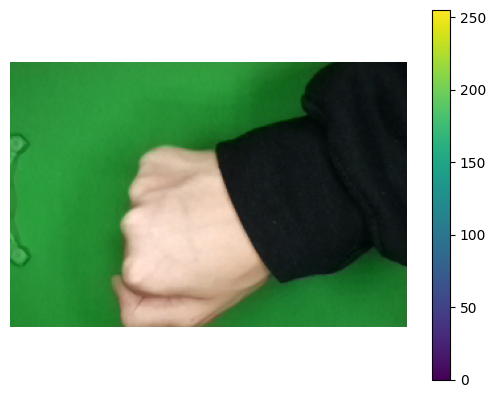

In [7]:
num_aleatorio = random.randint(0, 700)
# Crear una nueva figura de matplotlib (tamaño por defecto)
plt.figure()

# Mostrar la imagen de prueba número aleatorio del conjunto de datos
plt.imshow(imagenes_prueba[num_aleatorio])  # Muestra la imagen con mapeo de colores automático

# Añadir una barra de color (colorbar) que indica la escala de valores de píxeles
plt.colorbar()  # Útil para entender el rango de valores de intensidad en la imagen

# Configuraciones de estilo para una visualización más limpia:
plt.grid(False)    # Desactivar la cuadrícula (repetido por seguridad)
plt.box(False)     # Desactivar el borde alrededor de la imagen
plt.grid(False)    # Desactivar la cuadrícula nuevamente (redundante pero inofensivo)
plt.xticks([])     # Eliminar las marcas y etiquetas del eje X
plt.yticks([])     # Eliminar las marcas y etiquetas del eje Y

# Mostrar la figura con la imagen y la barra de color
plt.show()

In [8]:
### Escalar los píxeles de las imágenes del rango [0, 255] al rango [0, 1]
imagenes_entrena = imagenes_entrena / 255
imagenes_prueba = imagenes_prueba / 255

# Modelo CNN para Clasificación de Imágenes

In [9]:
# Definición del modelo secuencial (capas apiladas linealmente)
modelo = tf.keras.Sequential([
    # Primera capa convolucional:
    # - 32 filtros de 3x3 píxeles
    # - Función de activación ReLU (Rectified Linear Unit)
    # - Input shape: 200 (alto) x 300 (ancho) x 3 canales (RGB)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 300, 3)),

    # Capa de Max Pooling:
    # - Reducción dimensional con ventana de 2x2
    # - Reduce el tamaño espacial a la mitad (selecciona el valor máximo en cada ventana)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Segunda capa convolucional:
    # - 64 filtros de 3x3 píxeles
    # - Función de activación ReLU
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Segunda capa de Max Pooling:
    # - Nueva reducción dimensional 2x2
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Capa Flatten:
    # - "Aplana" los mapas de características 2D a un vector 1D
    # - Prepara los datos para las capas densas (fully connected)
    tf.keras.layers.Flatten(),

    # Capa Densa (fully connected):
    # - 64 neuronas con activación ReLU
    # - Capa intermedia para aprendizaje de características complejas
    tf.keras.layers.Dense(64, activation="relu"),

    # Capa de Salida:
    # - 3 neuronas (una por cada clase: paper, rock, scissors)
    # - Sin función de activación (logits)
    tf.keras.layers.Dense(3),

    # Capa Softmax:
    # - Convierte los logits en probabilidades (suma = 1)
    # - Cada neurona representa la probabilidad de pertenecer a cada clase
    tf.keras.layers.Softmax()
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Cofigurarción del Modelo para Entrenamiento

In [10]:
modelo.compile(
    # Optimizador: Descenso de Gradiente Estocástico (SGD)
    # - Algoritmo de optimización básico que actualiza los pesos en dirección opuesta al gradiente
    # - Versión por defecto sin ajuste de learning rate (puede no ser óptimo)
    optimizer="sgd",  # Equivalente a tf.keras.optimizers.SGD()

    # Función de pérdida: Sparse Categorical Crossentropy
    # - Adecuada para clasificación multi-clase con etiquetas enteras (0, 1, 2)
    # - Calcula la diferencia entre probabilidades predichas y etiquetas reales
    # - "Sparse" significa que acepta etiquetas enteras directamente (no requiere one-hot encoding)
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),

    # Métrica a monitorear: Precisión (Accuracy)
    # - Porcentaje de predicciones correctas sobre el total
    # - Útil para problemas balanceados como rock-paper-scissors
    metrics=["accuracy"]
)

# Entrenamiento de la CNN

In [11]:
# Entrena la red neuronal con las imágenes y clases del conjunto de entrenamiento.
# El proceso se repite durante 10 épocas, es decir, el modelo verá todo el conjunto de datos 10 veces.
modelo.fit(imagenes_entrena, clases_entrena, epochs=10)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.3639 - loss: 1.1487
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.4967 - loss: 0.9889
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7491 - loss: 0.7194
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7934 - loss: 0.5519
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8286 - loss: 0.4597
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8157 - loss: 0.4474
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8734 - loss: 0.3319
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8962 - loss: 0.2841
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8937 - loss: 0.2695
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9214 - loss: 0.2061


# Evaluación del modelo

In [12]:
# Evalúa el rendimiento del modelo sobre el conjunto de prueba (imágenes y etiquetas reales)
# Retorna la pérdida (loss) y la exactitud (accuracy)
perdida, exactitud = modelo.evaluate(imagenes_prueba, clases_prueba)

# Imprime la pérdida obtenida en el conjunto de prueba
print(f"Pérdida (Loss) en el conjunto de prueba: {perdida:.4f}")

# Imprime la exactitud obtenida, que representa el porcentaje de imágenes clasificadas correctamente
print("Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba:", exactitud)

# Imprime la exactitud como porcentaje con dos decimales
print(f"Exactitud (Accuracy) en el conjunto de prueba: {exactitud * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.8964 - loss: 0.3026
Pérdida (Loss) en el conjunto de prueba: 0.2289
Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba: 0.9285714030265808
Exactitud (Accuracy) en el conjunto de prueba: 92.86%


# Clasificación de las imágenes del conjunto de entrenamiento con la CNN entrenada

In [17]:
# Genera predicciones del modelo para las imágenes del conjunto de pruentrenamiento
# El resultado será un array con las probabilidades asignadas a cada clase para cada imagen
predicciones_train = modelo.predict(imagenes_entrena)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


In [19]:
# Crea un arreglo vacío para almacenar la clase predicha de cada imagen del conjunto de entrenamiento
# El tamaño del arreglo es igual al número total de imágenes de entrenamiento (num_entrena * número de clases)
clase_predicha_train = np.empty(num_entrena * len(clases), dtype="uint8")

# Recorre cada instancia (imagen) del conjunto de prueba
for instancia in range(num_entrena * len(clases)):
    # Obtiene la clase predicha: índice de la mayor probabilidad en las predicciones de esa imagen
    clase_predicha_train[instancia] = np.argmax(predicciones_train[instancia])

    # Compara la clase predicha con la clase verdadera
    if clase_predicha_train[instancia] == clases_entrena[instancia]:
        print("Probabilidades:", predicciones_train[instancia],
              "Clase predicha:", clase_predicha_train[instancia],
              "Clase correcta:", clases_entrena[instancia],
              "La Red Neuronal ACERTÓ")
    else:
        print("Probabilidades:", predicciones_train[instancia],
              "Clase predicha:", clase_predicha_train[instancia],
              "Clase correcta:", clases_entrena[instancia],
              "La Red Neuronal ERRÓ")


Probabilidades: [0.95828134 0.03950227 0.00221642] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.3235268 0.130122  0.5463512] Clase predicha: 2 Clase correcta: 0 La Red Neuronal ERRÓ
Probabilidades: [0.8894645  0.05935886 0.05117664] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.41583624 0.13002409 0.45413965] Clase predicha: 2 Clase correcta: 0 La Red Neuronal ERRÓ
Probabilidades: [9.8706937e-01 9.6485234e-04 1.1965766e-02] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9554706e-01 4.0987087e-03 3.5428614e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [7.7055413e-01 2.2944359e-01 2.3180762e-06] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9962842e-01 3.2364227e-05 3.3912537e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.96582174 0.02192333 0.01225498] Clase predicha: 0 Clase correcta: 0 La R

Matriz de Confusión conjunto entrenamiento:
 [[427  13  50]
 [  4 482   4]
 [ 13   4 473]]


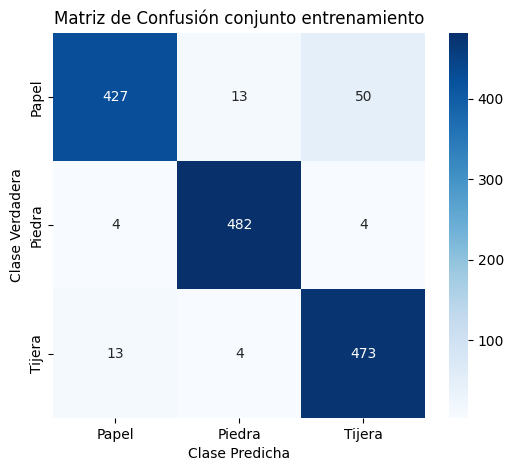


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       490
           1       0.97      0.98      0.97       490
           2       0.90      0.97      0.93       490

    accuracy                           0.94      1470
   macro avg       0.94      0.94      0.94      1470
weighted avg       0.94      0.94      0.94      1470



In [28]:
# Asignación de etiquetas numéricas para cada clase: papel = 0, piedra = 1, tijera = 2
# Genera la matriz de confusión comparando etiquetas reales del conjunto de entrenamiento (es decir, datos ya vistos) con las predichas
matriz_train = tf.math.confusion_matrix(clases_entrena, clase_predicha_train)

# Imprime la matriz de confusión como array de NumPy
print("Matriz de Confusión conjunto entrenamiento:\n", matriz_train.numpy())

# Define etiquetas de clase
etiquetas = ['Papel', 'Piedra', 'Tijera']

# Convierte la matriz de confusión a un array de NumPy (por si está en formato Tensor)
matriz_np = matriz_train.numpy()

# Configura el tamaño de la figura
plt.figure(figsize=(6, 5))

# Dibuja la matriz de confusión como un mapa de calor
sns.heatmap(matriz_np, annot=True, fmt="d", cmap="Blues",
            xticklabels=etiquetas, yticklabels=etiquetas)

# Títulos y etiquetas
plt.title("Matriz de Confusión conjunto entrenamiento")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Verdadera")

# Muestra la figura
plt.show()


print("\nReporte de clasificación:")
print(classification_report(clases_entrena, clase_predicha_train))

# Clasificación de las Imágenes del conjunto de prueba con la CNN entrenada

In [21]:
# Genera predicciones del modelo para las imágenes del conjunto de prueba
# El resultado será un array con las probabilidades asignadas a cada clase para cada imagen
predicciones = modelo.predict(imagenes_prueba)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


# Salida de la CNN para cada imagen del conjunto de prueba

In [22]:
# Crea un arreglo vacío para almacenar la clase predicha de cada imagen del conjunto de prueba
# El tamaño del arreglo es igual al número total de imágenes de prueba (num_prueba * número de clases)
clase_predicha = np.empty(num_prueba * len(clases), dtype="uint8")

# Recorre cada instancia (imagen) del conjunto de prueba
for instancia in range(num_prueba * len(clases)):
    # Obtiene la clase predicha: índice de la mayor probabilidad en las predicciones de esa imagen
    clase_predicha[instancia] = np.argmax(predicciones[instancia])

    # Compara la clase predicha con la clase verdadera
    if clase_predicha[instancia] == clases_prueba[instancia]:
        print("Probabilidades:", predicciones[instancia],
              "Clase predicha:", clase_predicha[instancia],
              "Clase correcta:", clases_prueba[instancia],
              "La Red Neuronal ACERTÓ")
    else:
        print("Probabilidades:", predicciones[instancia],
              "Clase predicha:", clase_predicha[instancia],
              "Clase correcta:", clases_prueba[instancia],
              "La Red Neuronal ERRÓ")


Probabilidades: [0.989995   0.00840517 0.00159982] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.59242934 0.01478164 0.39278904] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.9622655  0.01236995 0.02536456] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.9670619  0.01808659 0.01485159] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9233657e-01 7.9025095e-04 6.8731899e-03] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.97149414 0.02434056 0.00416524] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.0591696  0.15458754 0.78624284] Clase predicha: 2 Clase correcta: 0 La Red Neuronal ERRÓ
Probabilidades: [0.5239964  0.04301916 0.43298444] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.99725586 0.00152276 0.00122144] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Pro

# Resultado de la evaluación: matriz de confusión:

Matriz de Confusión:
 [[181  10  19]
 [  1 205   4]
 [  6   5 199]]


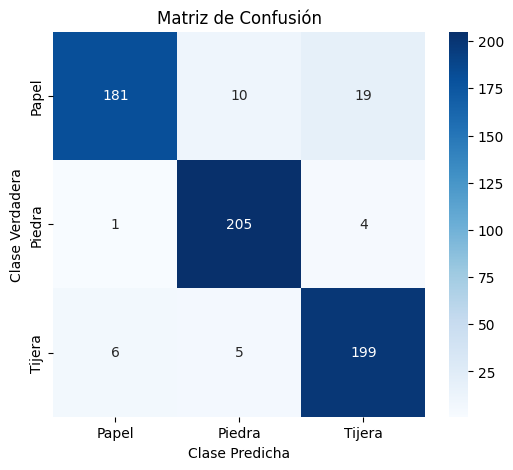


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       210
           1       0.93      0.98      0.95       210
           2       0.90      0.95      0.92       210

    accuracy                           0.93       630
   macro avg       0.93      0.93      0.93       630
weighted avg       0.93      0.93      0.93       630



In [27]:
# Asignación de etiquetas numéricas para cada clase: papel = 0, piedra = 1, tijera = 2
# Genera la matriz de confusión comparando etiquetas reales con predichas
matriz = tf.math.confusion_matrix(clases_prueba, clase_predicha)

# Imprime la matriz de confusión como array de NumPy
print("Matriz de Confusión:\n", matriz.numpy())

# Define etiquetas de clase
etiquetas = ['Papel', 'Piedra', 'Tijera']

# Convierte la matriz de confusión a un array de NumPy (por si está en formato Tensor)
matriz_np = matriz.numpy()

# Configura el tamaño de la figura
plt.figure(figsize=(6, 5))

# Dibuja la matriz de confusión como un mapa de calor
sns.heatmap(matriz_np, annot=True, fmt="d", cmap="Blues",
            xticklabels=etiquetas, yticklabels=etiquetas)

# Títulos y etiquetas
plt.title("Matriz de Confusión")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Verdadera")

# Muestra la figura
plt.show()

print("\nReporte de clasificación:")
print(classification_report(clases_prueba, clase_predicha))
